# TRABAJO PRACTICO N° 1

---


# Aprendizaje Automático 1
### INTEGRANTES: Rondini, Sofía - Cancio, Jose
### AÑO: 2024 - 1º CUAT.

---



In [796]:
## CARGAR LAS LIBRERIAS NECESARIAS

In [797]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [798]:
### IMPORTAR LOS DATOS DEL ARCHIVO CSV COMO DATAFRAME DE PANDAS

file_path = "https://raw.githubusercontent.com/sofiarondini/AA1-RondiniCancio/main/weatherAUS%20(1).csv"
df = pd.read_csv(file_path, sep=',',engine='python')

***# INFORMACION DEL DATASET***

Los datos que componen el dataset corresponden a observaciones climaticas realizadas en un determinado dia ("Date") y en una determinada localidad ("Location"), en Australia, en un periodo de 10 años aproximadamente.
Si bien, las unidades de las medidas observadas no figuran en el dataset o en archivo aparte, las referencias de las caracteristicas y sus unidades fueron extraidas, principalmente, del Bureau of Meteorology de Australia (https://reg.bom.gov.au/),  (http://www.bom.gov.au/climate/averages/tables/cw_066062_All.shtml)

 **Date:** el dia cuando se realizó la obervación   
 **Location**: ciudades de Australia donde se tomaron las observaciones climaticas - Variable categorica

 **MinTemp:** minima temperatura medida en Grados Celsius - Variable numerica

 **MaxTemp:** maxima temperatura medida en Grados Celsius - Variable numerica

 **Rainfall:** precipitacion medida en mm - Variable numerica

 **Evaporation**: evaporacion medida en mm - Variable numerica

 **Sunshine:** tiempo en que la luz solar es mayor que un determinado umbral medido en horas - Variable numerica

 **WindGustDir**: direccion de la rafaga de viento respecto de los puntos cardinales y colaterales- Variable
 categorica

 **WindGustSpeed:** velocidad de la rafaga de viento medida en Km/h - Variable
 numerica

 **WindDir9am:** direccion del viento medida a la hora 9AM respecto de los puntos cardinales y colaterales -- Variable
 categorica

 **WindDir3pm:** direccion del viento medida a la hora 3PM en respecto de los puntos cardinales y colaterales- - Variable
 categorica

 **WindSpeed9am:** velocidad del viento medida a la hora 9AM en Km/h - Variable
  numerica

 **WindSpeed3pm:** velocidad del viento medida a la hora 3PM en Km/h - Variable
  numerica

 **Humidity9am:** humedad relativa medida a la hora 9AM en porcentaje de vapor de agua presente en el aire (%) - Variable numerica

 **Humidity3pm:** humedad relativa medida a la hora 3PM en porcentaje de vapor de agua presente en el aire (%) - Variable numerica

 **Pressure9am:** presion atmosferica medida a la hora 9AM en hectopascales (hpa) - Variable numerica

 **Pressure3pm:** presion atmosferica medida a la hora 3PM en hectopascales (hpa) - Variable numerica

 **Cloud9am:** fraccion del cielo oscurecida por las nubes, medida a la hora 9AM en octavos u "octas" de cielo cubierto - Variable numerica

 **Cloud3pm:** fraccion del cielo oscurecida por las nubes, medida  a la hora 3PM en octavos u "octas" de cielo cubierto - Variable numerica

 **Temp9am:** temperatura ambiente medida a la hora 9AM en Grados - Variable numerica

 **Temp3pm:** temperatura ambiente medida a la hora 3PM en Grados - Variable numerica

 **RainToday:** si llovio el dia de la observacion (SI/NO)- Variable categorica

 **RainTomorrow:** si llovio el dia posterior a la observacion (SI/NO)- vartiable categorica

 **RainfallTomorrow:** precipitacion del dia posterior a la observacion medida en mm - Variable numerica


In [799]:
### VISTA DE LOS PRIMEROS 5 REGISTROS
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [800]:
## FORMATO DEL DATASET
df.shape  ## VEMOS QUE CONTIENE 145412 OBSERVACIONES

(145412, 25)

In [801]:
### COLUMNAS, ¿cuáles son variables numéricas y cuales variables categóricas?
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [802]:
## INFO DEL DATASET(COLUMNAS DATOS, TIPO DATOS, CANTIDAD VALORES NO NULOS, ETC )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [803]:
## CONVERTIR LA VARIABLE 'Date' A TIPO DATETIME
df['Date']= df['Date'].astype('datetime64[ns]')

In [804]:
## VEMOS CUANTOS SON LOS VALORES UNICOS DE LA VARIABLE "Location"
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [805]:
df.Location.nunique()

49

*Filtramos el dataset con las Localidades de interes para el problema*

In [806]:
filtro= df.Location.isin (['Adelaide', 'Canberra', 'Cobar','Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier','Sydney', 'SydneyAirport'])
filtro

0         False
1         False
2         False
3         False
4         False
          ...  
145407    False
145408    False
145409    False
145410    False
145411    False
Name: Location, Length: 145412, dtype: bool

In [807]:
### Vista de datos filtrados por las ciudades seleccionadas
df_filtrado= df[filtro]
df_filtrado


,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
6047,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
6048,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
6049,6051,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0
6050,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
6051,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,102547,2017-06-20,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,...,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0
102516,102548,2017-06-21,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,...,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0
102517,102549,2017-06-22,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,...,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0
102518,102550,2017-06-23,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,...,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2


In [808]:
# COMPROBAMOS QUE EL FILTRADO DE LAS LOCALIDADES ES EL CORRECTO
df_filtrado.Location.unique()

array(['Cobar', 'Sydney', 'SydneyAirport', 'Canberra', 'MelbourneAirport',
       'Melbourne', 'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

*Forma del dataset*

In [809]:
df_filtrado.shape

(28233, 25)

*Borramos la columna "Unnamed: 0" pues son Id de los registros del dataset original que no nos aportan informacion alguna de interes*

In [810]:
df_filtrado.drop(columns='Unnamed: 0', inplace=True)

*Si las ciudades las tomamos como "una sola" entonces borramos la columna 'Location' porque su varianza es cero y no contribuye en nada al modelo*

In [811]:
df_filtrado.drop(columns='Location', inplace=True)

*Ordenamos el dataset por la columna 'Date' (fechas de las observaciones), para que al dividir el mismo en el siguiente punto, los subconjuntos no queden con fechas intercaladas correspondientes al otro subconjunto*

In [812]:
df_filtrado.sort_values(by= 'Date', inplace=True)
#df_filtrado

## Split del Dataset

In [813]:
# División de los datos en train y test

X = df_filtrado.drop(columns= ['RainfallTomorrow', 'RainTomorrow'])
y = df_filtrado['RainfallTomorrow']
y_clasif= df_filtrado['RainTomorrow'] # NO LO USAMOS PARA PREDECIR EL MODELO DE REGRESION POR SER VARIABLE TARGET PARA MODELO DE CLASIFICACION

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42, shuffle= False)

In [814]:
X_train.shape, X_test.shape

((22586, 21), (5647, 21))

In [815]:
y_train.shape, y_test.shape

((22586, 1), (5647, 1))

In [816]:
X_train.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [817]:
X_train['RainfallTomorrow'] = y_train

In [818]:
X_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow
45573,2007-11-01,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,3.6
45574,2007-11-02,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,3.6
45575,2007-11-03,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,39.8
45576,2007-11-04,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,2.8
45577,2007-11-05,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35890,2015-10-06,20.0,36.4,0.0,8.6,11.4,NNE,52.0,NW,NE,...,31.0,21.0,1023.0,1019.3,1.0,1.0,25.0,32.5,No,0.0
98853,2015-10-06,18.1,23.8,0.0,NaN,NaN,SW,44.0,SW,SW,...,61.0,49.0,1017.1,1022.4,NaN,NaN,19.9,19.3,No,0.0
8427,2015-10-06,20.8,36.8,0.0,8.4,NaN,NNW,48.0,NNE,NW,...,13.0,6.0,1022.0,1019.5,0.0,0.0,26.9,35.8,No,0.0
101892,2015-10-06,16.6,20.7,0.0,12.0,4.6,W,52.0,WNW,WSW,...,63.0,65.0,1012.3,1019.9,5.0,7.0,18.7,15.1,No,0.0


In [819]:
## Obtener los nombres de las variables numericas y categoricas
num_var = [variable for variable in X_train.columns if X_train[variable].dtypes == ('int64' and 'float64') ]
cat_var = [variable for variable in X_train.columns if X_train[variable].dtypes == ('O')]

print(f"La variables numericas en los datos son {num_var}.\n")
print(f"La variables categoricas en los datos son {cat_var}.")

La variables numericas en los datos son ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow'].

La variables categoricas en los datos son ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'].


In [820]:
## Observamos los unicos valores en cada una de las variables categoricas

for variable in cat_var:
    print(f"Los unicos valores en {variable} son {X_train[variable].unique()} (total de {X_train[variable].nunique()}).\n")


Los unicos valores en WindGustDir son ['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' nan 'SSW'] (total de 16).

Los unicos valores en WindDir9am son ['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W' nan] (total de 16).

Los unicos valores en WindDir3pm son ['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE' nan] (total de 16).

Los unicos valores en RainToday son ['No' 'Yes' nan] (total de 2).



# Datos faltantes

In [821]:
### Cantidad de valores faltantes.

X_train.isna().sum()

Date                   0
MinTemp              356
MaxTemp              343
Rainfall             741
Evaporation         2016
Sunshine            3962
WindGustDir         1571
WindGustSpeed       1568
WindDir9am          1415
WindDir3pm           414
WindSpeed9am         350
WindSpeed3pm         336
Humidity9am          604
Humidity3pm          560
Pressure9am          624
Pressure3pm          617
Cloud9am            7177
Cloud3pm            7467
Temp9am              371
Temp3pm              365
RainToday            741
RainfallTomorrow     741
dtype: int64

In [822]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train.shape[0])*100),2)
valores_faltantes_df

,Variables,Numero_de_valores_faltantes,Porcentaje_de_valores_faltantes (%)
0,Date,0,0.0
1,MinTemp,356,2.0
2,MaxTemp,343,2.0
3,Rainfall,741,3.0
4,Evaporation,2016,9.0
5,Sunshine,3962,18.0
6,WindGustDir,1571,7.0
7,WindGustSpeed,1568,7.0
8,WindDir9am,1415,6.0
9,WindDir3pm,414,2.0


**DATOS FALTANTES: las variables con mayores datos faltantes son: "Evaporation", 'Cloud9am' y 'Cloud3pm'.**

# Imputacion de valores faltantes

---



In [823]:
def cambiar_mediana_fecha(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        fecha_actual = df.loc[indice, 'Date']
        filas_misma_fecha = df[df['Date'] == fecha_actual]
        mediana = filas_misma_fecha[columna_objetivo].median()
        df.at[indice, columna_objetivo] = mediana

    nulos = df[columna_objetivo].isnull().sum()
    return nulos

In [824]:
for col in num_var:
  cambiar_mediana_fecha(X_train, col)

In [825]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train.shape[0])*100),2)
valores_faltantes_df

,Variables,Numero_de_valores_faltantes,Porcentaje_de_valores_faltantes (%)
0,Date,0,0.0
1,MinTemp,0,0.0
2,MaxTemp,0,0.0
3,Rainfall,0,0.0
4,Evaporation,0,0.0
5,Sunshine,0,0.0
6,WindGustDir,1571,7.0
7,WindGustSpeed,2,0.0
8,WindDir9am,1415,6.0
9,WindDir3pm,414,2.0


Observamos que la variable 'WindGustSpeed' nos queda con 2 valores nulos.
Buscando en que registros (index) estan esos nulos, encontramos que tienen por fecha el '2008-05-30'. Al querer calcular la mediana, la funcion nos devuelve 'NaN' porque no habia valor numerico alguno.
Imputamos con la media de los 2 dias anteriores.


In [826]:
X_train[(X_train['Date'] >= '2008-05-29') & (X_train['Date'] <= '2008-05-31')][['Date','WindGustSpeed']]

,Date,WindGustSpeed
45783,2008-05-29,20.0
30285,2008-05-29,20.0
45784,2008-05-30,NaN
30286,2008-05-30,NaN
30287,2008-05-31,22.0
45785,2008-05-31,22.0


In [827]:
X_train.at[45784, 'WindGustSpeed'] = 21
X_train.at[30286, 'WindGustSpeed'] = 21

In [828]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train.shape[0])*100),2)
valores_faltantes_df

,Variables,Numero_de_valores_faltantes,Porcentaje_de_valores_faltantes (%)
0,Date,0,0.0
1,MinTemp,0,0.0
2,MaxTemp,0,0.0
3,Rainfall,0,0.0
4,Evaporation,0,0.0
5,Sunshine,0,0.0
6,WindGustDir,1571,7.0
7,WindGustSpeed,0,0.0
8,WindDir9am,1415,6.0
9,WindDir3pm,414,2.0


Calculamos las medianas y las modas de las variables del conjunto de entrenamiento para despues usarlas en el conjunto de test para imputar los valores nulos, si los hay.

In [829]:
num_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainfallTomorrow']

In [830]:
# Guardamos las medianas de las variables numericas
X_train_origen = X_train[num_var].copy()
medianas = X_train_origen.median()
medianas.columns = X_train_origen.columns
medianas

MinTemp               10.7
MaxTemp               20.7
Rainfall               0.0
Evaporation            4.0
Sunshine               7.2
WindGustSpeed         41.0
WindSpeed9am          13.0
WindSpeed3pm          19.0
Humidity9am           70.0
Humidity3pm           50.0
Pressure9am         1018.5
Pressure3pm         1016.4
Cloud9am               5.0
Cloud3pm               5.0
Temp9am               14.7
Temp3pm               19.2
RainfallTomorrow       0.0
dtype: float64

In [831]:
cat_var

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [832]:
# Guardamos las modas de las variables numericas
X_train_origen = X_train[cat_var].copy()
modas = X_train_origen.mode(0)
modas.columns = X_train_origen.columns
modas

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,N,N,S,No


In [833]:
# Funcion para imputar los valores numericos nulos en el conjunto de Test
def cambiar_mediana_test(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        df.at[indice, columna_objetivo] = medianas[columna_objetivo]


In [834]:
# Funcion para imputar los valores categoricos nulos en el conjunto de Test
def cambiar_moda_test(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        df.at[indice, columna_objetivo] = modas[columna_objetivo]


### Imputacion de valores faltantes variables categoricas

**ColumnTransformer** aplica transformadores a las columnas de una matriz o Pandas DataFrame.

En nuestro caso imputara los valores faltantes en las variables categoricas del dataframe (cat_var) con la moda de los datos de cada columna.

In [835]:
## COMPLETAR LOS VALORES NULOS NUMERICOS CON LA MODA
imput_cat = ColumnTransformer([('category', SimpleImputer(strategy='most_frequent'), cat_var)])
X_train[cat_var] = imput_cat.fit_transform(X_train[cat_var])

In [836]:
## COMPROBAMOS QUE NO TENEMOS VALORES NULOS EN LAS VARIABLES CATEGORICAS
X_train[cat_var].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Verificar existencia de Datos Duplicados

In [837]:
## EXISTENCIA DE DATOS DUPLICADOS
duplicados = X_train[X_train.duplicated()]
duplicados

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow


***NO EXISTEN DATOS DUPLICADOS***

*Está balanceado el Dataset?*

In [838]:
## COMPROBAR QUE LA VARIABLE "RainfallTomorrow" ESTA BALANCEDADA O NO
X_train['RainfallTomorrow'].value_counts()

RainfallTomorrow
0.0     14053
0.2      1362
0.4       643
0.6       473
0.8       345
        ...  
25.0        1
2.9         1
3.1         1
46.8        1
46.6        1
Name: count, Length: 317, dtype: int64

El Dataset esta desbalanceado. Es importante que nos hagamos esta pregunta porque un dataset desbalanceado puede generar sesgos en nuestro modelo. Lo vamos a resolver en siguientes entregas.

## Variables Descripcion


In [839]:
X_train.drop(columns='Date').describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,22586.0,11.059590,5.668137,-8.0,7.3,10.7,14.9,33.9
MaxTemp,22586.0,21.618097,6.591311,4.1,16.4,20.7,25.8,46.8
Rainfall,22586.0,1.972839,6.206100,0.0,0.0,0.0,0.8,119.4
Evaporation,22586.0,4.646934,3.531843,0.0,2.2,4.0,6.4,64.8
Sunshine,22586.0,6.842458,3.765754,0.0,3.9,7.2,9.9,14.3
WindGustSpeed,22586.0,42.125985,14.130791,11.0,31.0,41.0,50.0,122.0
WindSpeed9am,22586.0,15.343775,9.559740,0.0,9.0,13.0,20.0,69.0
WindSpeed3pm,22586.0,20.235677,8.986931,0.0,13.0,19.0,26.0,76.0
Humidity9am,22586.0,68.831821,18.658093,5.0,57.0,70.0,83.0,100.0
Humidity3pm,22586.0,50.419751,19.791665,1.0,37.0,50.0,63.0,100.0


*Se puede evidenciar el rango de las variables, por ejemplo las unicas que toman valores por debajo de 0 son las medidas de temperatura ['Temp9am”'y 'MinTemp']. Las variables que tiene valores mas altos son las medidas de presion ['Pressure9am', 'Pressure3pm']. 'Rainfall' posee una mediana de 0 (el 50% de las observaciones) pero una valor maximo de 119.40 mm*

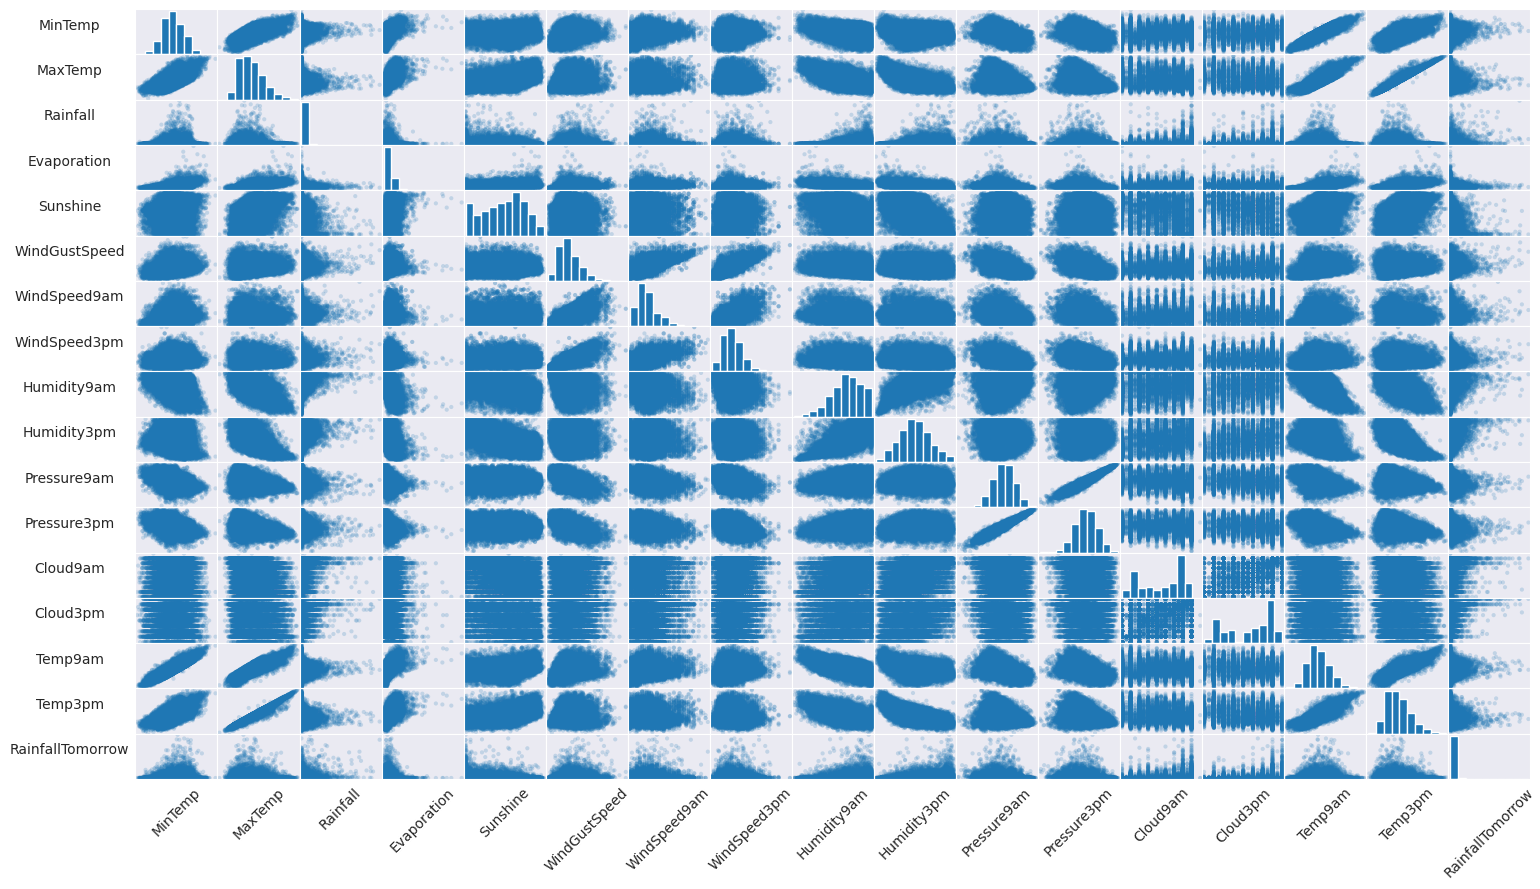

In [840]:
from pandas.plotting import scatter_matrix
atributos = num_var
sm = scatter_matrix(X_train[atributos], alpha=0.2, figsize=(18, 10))

#Cambiar la rotacion de las etiquetas en los ejes
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.8,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

Las correlaciones mas fuertes que se visualizan son en las tempetaturas entre si y ambas presiones.

*Visualizamos la distribucion de las variables numericas*

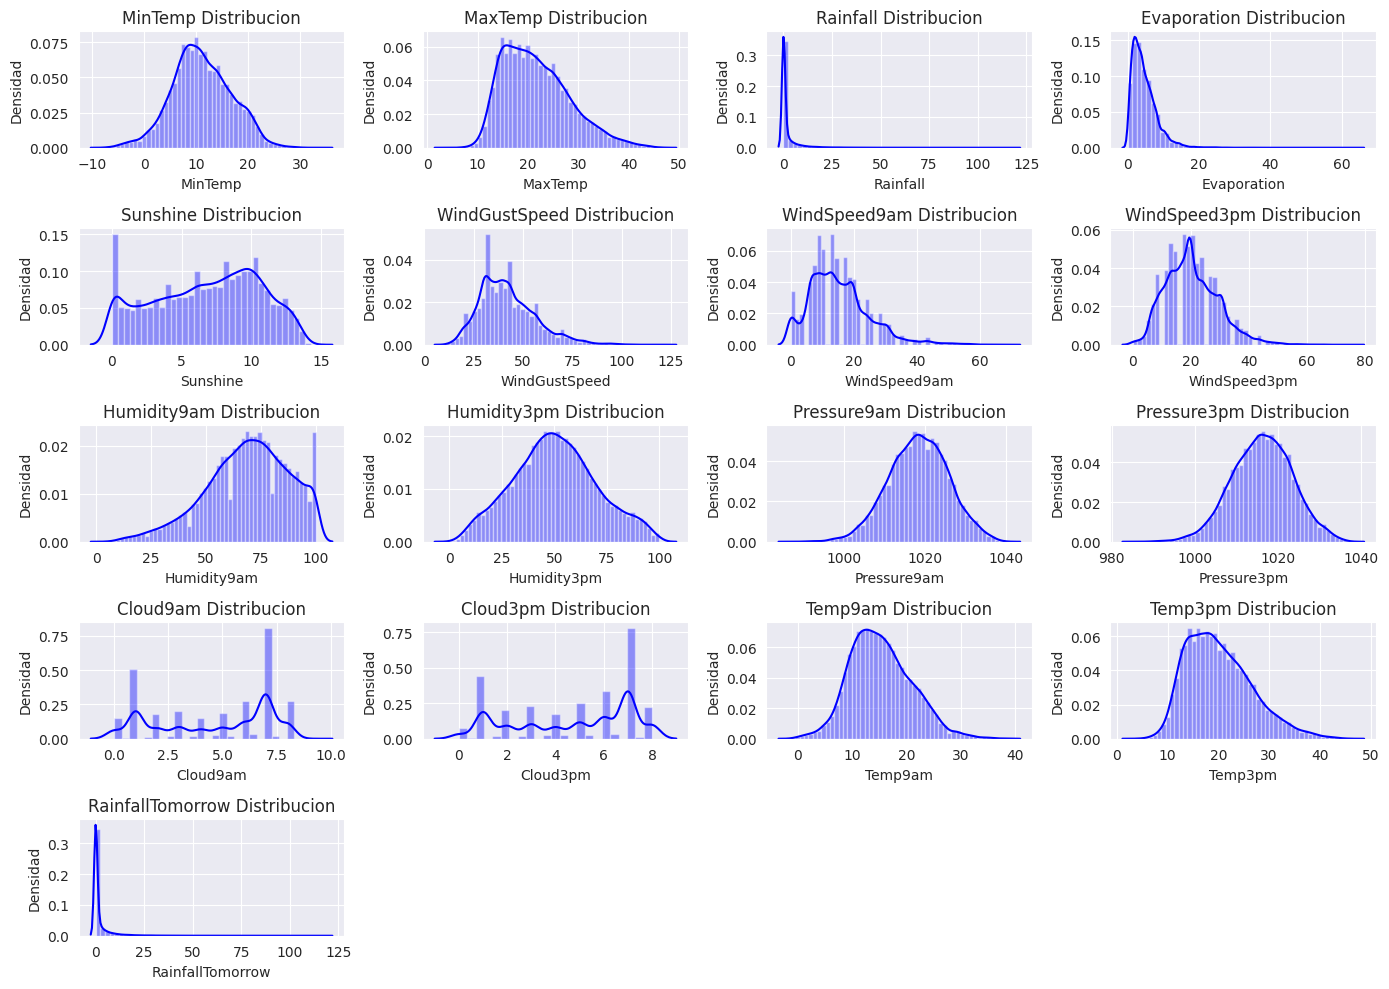

In [841]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
for index, variable in enumerate(num_var):
    plt.subplot(5,4,index+1)
    sns.distplot(X_train[variable],kde=True, color='b')
    plt.xlabel(variable)
    plt.ylabel('Densidad')
    plt.title(f"{variable} Distribucion")

plt.tight_layout()

Observamos que hay muchas variables cuyas distribuciones estan sesgadas a la derecha (en mayor o menor grado) como 'Rainfall', 'Evaporation', 'RainFallTomorrow', etc.

Tambien vemos que entre los pares: 'MinTemp' y 'Temp9am', 'MaxTemp' y 'Temp3pm', 'Pressure9am' y 'Pressure3pm', las distribuciones son bastantes parecidas (mas alla de lo valores individuales).

Otras variables, como 'Humidity9am', 'Pressure9am' y ambas 'Cloud...',  presentan sesgo hacia la izquierda.

Por otro lado, la variable 'Rainfall' presenta muchos valores iguales a 0.


# Asimetria de los datos utilizando el metodo Skew de Pandas

Interpretación:

*   asimetría = 0: Distribución simétrica

*   asimetría > 0: Distribución asimétrica a la derecha

*   asimetría < 0: Distribución asimétrica a la izquierda

In [842]:
# skew = df_X_train.drop(columns= 'Date').skew()
skew = X_train[num_var].skew()
print(skew)

MinTemp             0.059482
MaxTemp             0.676834
Rainfall            6.987880
Evaporation         2.376776
Sunshine           -0.213947
WindGustSpeed       0.834009
WindSpeed9am        0.994850
WindSpeed3pm        0.625033
Humidity9am        -0.468083
Humidity3pm         0.118216
Pressure9am        -0.136567
Pressure3pm        -0.125273
Cloud9am           -0.348326
Cloud3pm           -0.391041
Temp9am             0.385007
Temp3pm             0.665391
RainfallTomorrow    6.990179
dtype: float64


Comprobamos que el resultado numerico de la asimetria que nos brinda Skew coincide con lo observado en los histogramas.

# Visualizamos la distribucion de las variables categoricas

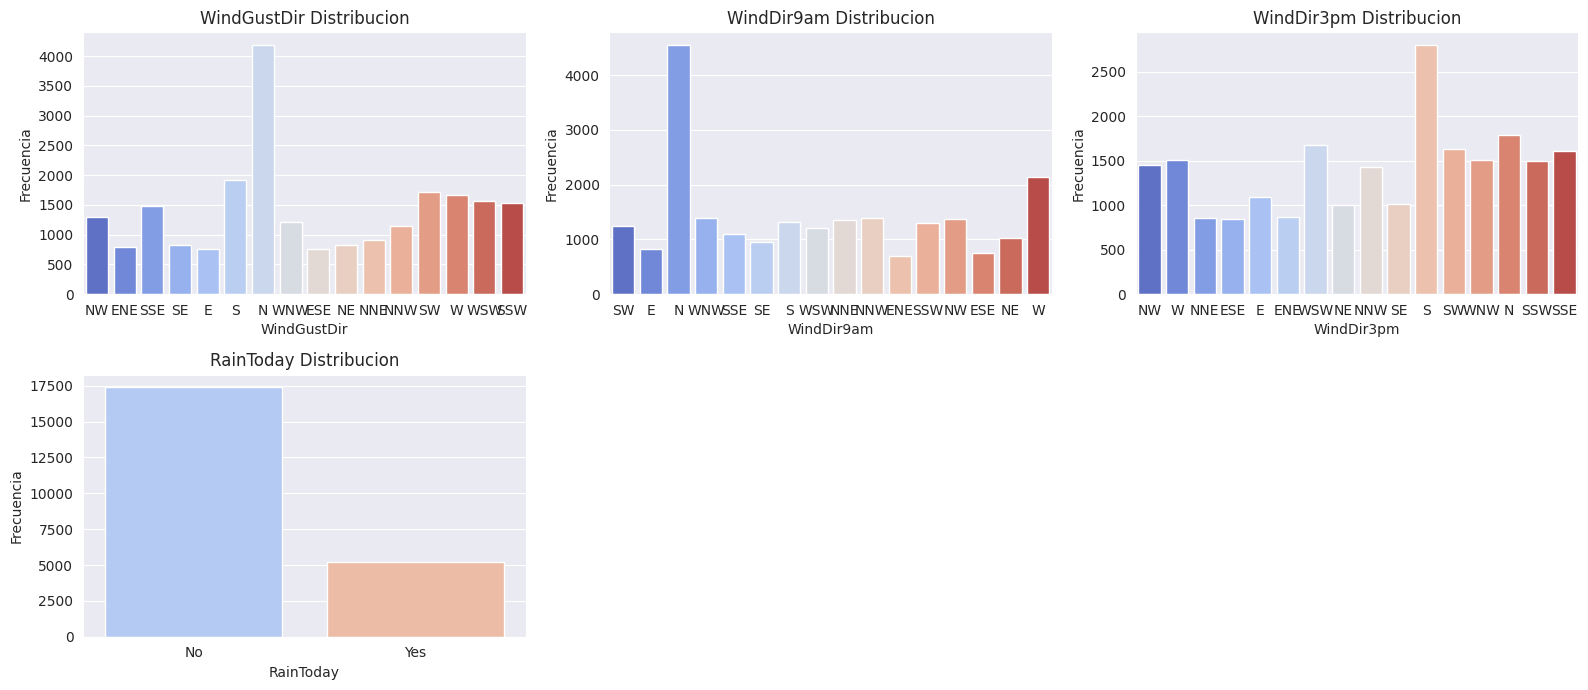

In [843]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,7))
for index, variable in enumerate(cat_var):
    plt.subplot(2,3,index+1)
    sns.countplot(x=variable,data=X_train,palette='coolwarm')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title(f"{variable} Distribucion")

plt.tight_layout()

La moda en las variables 'WindGustDir' y 'WindDir9am' es la direccion N(norte), en 'WindDir3pm' es la direccion S(sur) y que de la variable 'RainToday' podemos decir que la proporcion de dias en que no llovio es mucho mayor de los que si.

### Codificar los valores de las variables

In [844]:
X_train[cat_var]

,WindGustDir,WindDir9am,WindDir3pm,RainToday
45573,NW,SW,NW,No
45574,ENE,E,W,Yes
45575,NW,N,NNE,Yes
45576,NW,WNW,W,Yes
45577,SSE,SSE,ESE,Yes
...,...,...,...,...
35890,NNE,NW,NE,No
98853,SW,SW,SW,No
8427,NNW,NNE,NW,No
101892,W,WNW,WSW,No


In [845]:
categorico = X_train.select_dtypes(include = "object").columns
for i in range(len(categorico)):
    X_train[categorico[i]] = LabelEncoder().fit_transform(X_train[categorico[i]])

In [846]:
# VEMOS COMO QUEDARON CODIFICADAS LAS VARIABLES CATEGORICAS
X_train[cat_var]

,WindGustDir,WindDir9am,WindDir3pm,RainToday
45573,7,12,7,0
45574,1,0,13,1
45575,7,3,5,1
45576,7,14,13,1
45577,10,10,2,1
...,...,...,...,...
35890,5,7,4,0
98853,12,12,12,0
8427,6,5,7,0
101892,13,14,15,0


## Verificamos la presencia de valores atipicos

Realizamos un gráfico Boxplot para visualizar la distribución de los valores de las variables.

Debido a los valores numericos mas altos de las 2 variables "Pressure" respecto del resto, se grafican aparte, para visualizar mejor el grafico del resto.

In [847]:
columnas = [col for col in X_train.columns if ((col != 'Pressure9am') & (col != 'Pressure3pm'))]

In [848]:
columnas

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainfallTomorrow']

<Axes: >

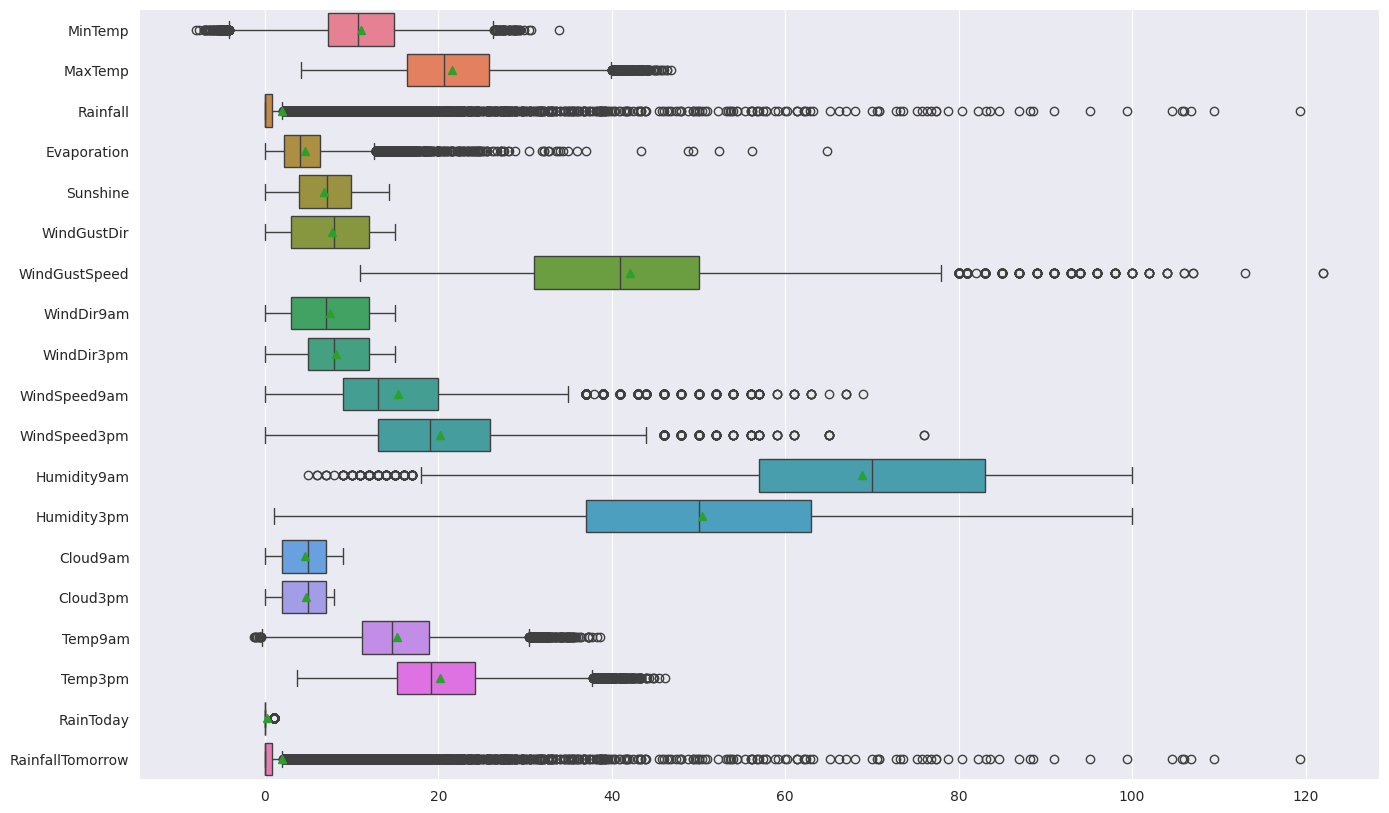

In [849]:
plt.figure(figsize= (16,10))
sns.boxplot(X_train[columnas], orient= 'h', showmeans= True)

<Axes: >

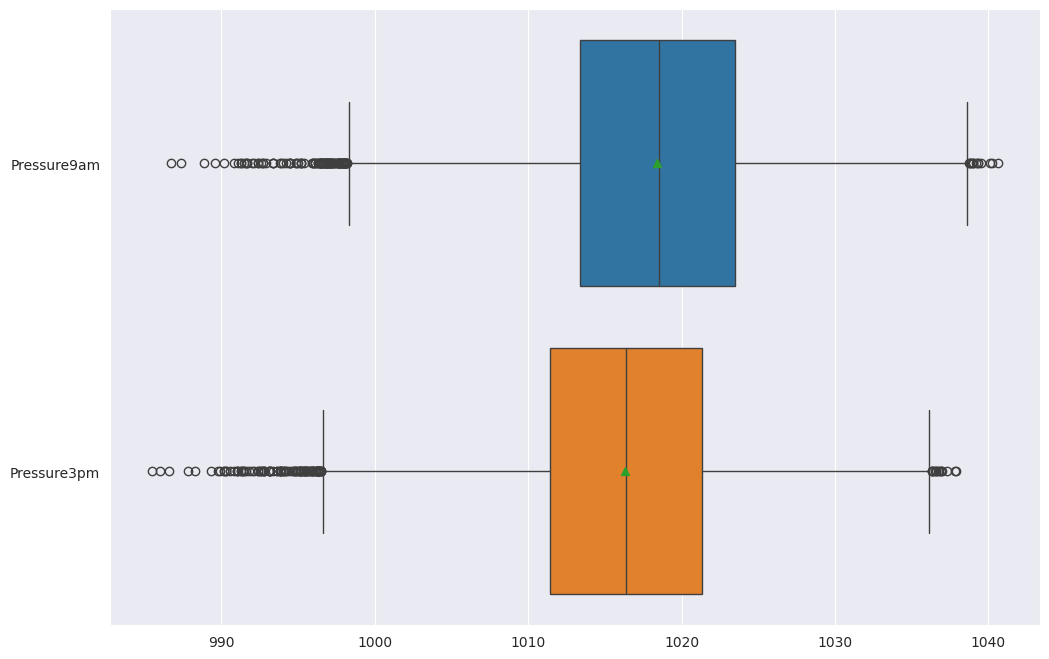

In [850]:
plt.figure(figsize= (12,8))
sns.boxplot(X_train[['Pressure9am', 'Pressure3pm']], orient= 'h', showmeans= True)


Podemos observar en varias variables la presencia de valores atipicos (outliers). Vamos a analizarlos con cuidado antes de tomar una decision.

Se destacan las variables correspondientes a la nubosidad donde los datos estan bastante centrados y las medias y medianas son casi iguales

### Variable "Rainfall"



In [851]:
## VARIABLE "Rainfall"
X_train['Rainfall'].describe()

count    22586.000000
mean         1.972839
std          6.206100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        119.400000
Name: Rainfall, dtype: float64

In [852]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Rainfall'].quantile(0.75) - X_train['Rainfall'].quantile(0.25)
lim_sup_outliers= X_train['Rainfall'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Rainfall'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(2.0, -1.2000000000000002)

In [853]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Rainfall'] > lim_sup_outliers].Rainfall.count()



4110

In [854]:
X_train[X_train['Rainfall'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"Rainfall"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 119.40 mm, el cual es un valor logico y probable para una precipitacion.
**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "RainfallTomorrow"


In [855]:
## VARIABLE "RainfallTomorrow"
X_train['RainfallTomorrow'].describe()

count    22586.000000
mean         1.971662
std          6.205446
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        119.400000
Name: RainfallTomorrow, dtype: float64

In [856]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['RainfallTomorrow'].quantile(0.75) - X_train['RainfallTomorrow'].quantile(0.25)
lim_sup_outliers= X_train['RainfallTomorrow'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['RainfallTomorrow'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(2.0, -1.2000000000000002)

In [857]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['RainfallTomorrow'] > lim_sup_outliers].Rainfall.count()



4107

In [858]:
X_train[X_train['RainfallTomorrow'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"RainfallTomorrow"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 119.40 mm, el cual es un valor logico y probable para una precipitacion.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Evaporation"



In [859]:
## VARIABLE "Evaporation"
X_train['Evaporation'].describe()

count    22586.000000
mean         4.646934
std          3.531843
min          0.000000
25%          2.200000
50%          4.000000
75%          6.400000
max         64.800000
Name: Evaporation, dtype: float64

In [860]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Evaporation'].quantile(0.75) - X_train['Evaporation'].quantile(0.25)
lim_sup_outliers= X_train['Evaporation'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Evaporation'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(12.700000000000001, -4.1000000000000005)

In [861]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Evaporation'] > lim_sup_outliers].Rainfall.count()



660

In [862]:
X_train[X_train['Evaporation'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"Evaporation"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 64.80 mm, que es un valor logico y probable para la evaporacion.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Pressure3pm"



In [863]:
## VARIABLE "Evaporation"
X_train['Pressure3pm'].describe()

count    22586.000000
mean      1016.283901
std          7.236294
min        985.500000
25%       1011.400000
50%       1016.400000
75%       1021.300000
max       1037.900000
Name: Pressure3pm, dtype: float64

In [864]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Pressure3pm'].quantile(0.75) - X_train['Pressure3pm'].quantile(0.25)
lim_sup_outliers= X_train['Pressure3pm'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Pressure3pm'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(1036.1499999999999, 996.55)

In [865]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Pressure3pm'] > lim_sup_outliers].Rainfall.count()



15

In [866]:
X_train[X_train['Pressure3pm'] < lim_inf_outliers].Rainfall.count()

106

De lo analizado, existen algunos valores de la variable **"Pressure3pm"** que estan por arriba del limite superior y por debajo del inferior para considerarse atipicos. El valor maximo de la variable es igual a 1037.90 hpa y el minimo 985.50 hpa, los cuales son valores logicos y probables para la presion atmosferica.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Pressure9am"



In [867]:
## VARIABLE "Evaporation"
X_train['Pressure9am'].describe()

count    22586.000000
mean      1018.384548
std          7.383838
min        986.700000
25%       1013.400000
50%       1018.500000
75%       1023.500000
max       1040.600000
Name: Pressure9am, dtype: float64

In [868]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Pressure9am'].quantile(0.75) - X_train['Pressure9am'].quantile(0.25)
lim_sup_outliers= X_train['Pressure9am'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Pressure9am'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(1038.65, 998.25)

In [869]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Pressure9am'] > lim_sup_outliers].Rainfall.count()



13

In [870]:
X_train[X_train['Pressure9am'] < lim_inf_outliers].Rainfall.count()

116

De lo analizado, existen algunos valores de la variable **"Pressure9am"** que estan por arriba del limite superior y por debajo del inferior para considerarse atipicos. El valor maximo de la variable es igual a 1040.60 hpa y el minimo 986.70 hpa, los cuales son valores logicos y probables para la presion atmosferica.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Humidity9am"

In [871]:
## VARIABLE "Evaporation"
X_train['Humidity9am'].describe()

count    22586.000000
mean        68.831821
std         18.658093
min          5.000000
25%         57.000000
50%         70.000000
75%         83.000000
max        100.000000
Name: Humidity9am, dtype: float64

In [872]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Humidity9am'].quantile(0.75) - X_train['Humidity9am'].quantile(0.25)
lim_sup_outliers= X_train['Humidity9am'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Humidity9am'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(122.0, 18.0)

In [873]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Humidity9am'] > lim_sup_outliers].Rainfall.count()



0

In [874]:
X_train[X_train['Humidity9am'] < lim_inf_outliers].Rainfall.count()

165

De lo analizado, no existen valores de la variable **"Humidity9am"** que esten por arriba del limite superior y hay valores por debajo del inferior para considerarse atipicos. El valor maximo de la variable es igual a 100 % y el minimo 5% , los cuales son valores logicos y probables para la humedad .

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "WindGustSpeed"

In [875]:
## VARIABLE "Evaporation"
X_train['WindGustSpeed'].describe()

count    22586.000000
mean        42.125985
std         14.130791
min         11.000000
25%         31.000000
50%         41.000000
75%         50.000000
max        122.000000
Name: WindGustSpeed, dtype: float64

In [876]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['WindGustSpeed'].quantile(0.75) - X_train['WindGustSpeed'].quantile(0.25)
lim_sup_outliers= X_train['WindGustSpeed'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['WindGustSpeed'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(78.5, 2.5)

In [877]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['WindGustSpeed'] > lim_sup_outliers].Rainfall.count()



396

In [878]:
X_train[X_train['WindGustSpeed'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"WindGustSpeed"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 122 km/h, el cual es un valor logico y probable para la humedad .

**Por lo que concluimos que no seran eliminados del dataset.**

### Variables de Temperatura

In [879]:
print(f"Temp. minima:   {X_train['MinTemp'].min()} / {X_train['MinTemp'].max()}")
print(f"Temp. maxima:   {X_train['MaxTemp'].min()} / {X_train['MaxTemp'].max()}")
print(f"Temp. 9am:   {X_train['Temp9am'].min()} / {X_train['Temp9am'].max()}")
print(f"Temp. 3pm:   {X_train['Temp3pm'].min()} / {X_train['Temp3pm'].max()}")

Temp. minima:   -8.0 / 33.9
Temp. maxima:   4.1 / 46.8
Temp. 9am:   -1.3 / 38.6
Temp. 3pm:   3.7 / 46.1


De la misma manera que se analizaron las otras variables, veriamos que los valores maximos y minimos de las variables de temperaturas son normales y probables.

**Por lo que concluimos que no seran eliminados del dataset.**

*Eliminamos la variable 'Date' pues ya no la consideramos para el modelo*

In [880]:
# ELIMINAMOS LA COLUMNA "Date" PORQUE YA NO LA UTILIZAMOS PARA NUESTRO MODELO,
# PUES LAS TRANSFORMACIONES DE LOS DATOS USANDO LAS FECHAS DE LOS DATOS YA FUERON REALIZADAS

In [881]:
X_train.drop(columns='Date', inplace=True)

### Matriz de Correlacion

In [882]:
corr = X_train.corr(numeric_only=True)
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow
MinTemp,1.000000,0.705776,0.056726,0.574780,0.104806,-0.084118,0.219958,0.008372,-0.109159,0.158421,...,-0.327113,-0.104375,-0.412683,-0.396870,0.088000,0.024013,0.893008,0.680995,0.007224,0.087491
MaxTemp,0.705776,1.000000,-0.131258,0.635552,0.462953,-0.163671,0.108947,-0.190847,-0.137673,-0.019002,...,-0.520398,-0.576809,-0.297100,-0.372720,-0.205171,-0.230460,0.876411,0.982646,-0.266184,-0.083058
Rainfall,0.056726,-0.131258,1.000000,-0.093472,-0.196182,0.060347,0.119834,0.099763,0.061738,0.101389,...,0.243991,0.267707,-0.157015,-0.099972,0.176785,0.152288,-0.043684,-0.136481,0.551276,0.254497
Evaporation,0.574780,0.635552,-0.093472,1.000000,0.311563,-0.049251,0.238721,-0.042446,-0.022628,0.149097,...,-0.516635,-0.394947,-0.322466,-0.322274,-0.131079,-0.138166,0.649187,0.610181,-0.201146,-0.044576
Sunshine,0.104806,0.462953,-0.196182,0.311563,1.000000,-0.042311,0.006515,-0.014097,-0.039504,-0.033733,...,-0.397050,-0.575011,0.012984,-0.026944,-0.487930,-0.536394,0.285178,0.476821,-0.259542,-0.283728
WindGustDir,-0.084118,-0.163671,0.060347,-0.049251,-0.042311,1.000000,0.060533,0.359269,0.561472,-0.004850,...,0.019661,0.049540,-0.124322,-0.027554,0.036104,0.033695,-0.117257,-0.179743,0.139535,-0.023389
WindGustSpeed,0.219958,0.108947,0.119834,0.238721,0.006515,0.060533,1.000000,0.025367,0.043539,0.610094,...,-0.228746,-0.037813,-0.510626,-0.480788,0.035595,0.092249,0.217516,0.065436,0.122110,0.168295
WindDir9am,0.008372,-0.190847,0.099763,-0.042446,-0.014097,0.359269,0.025367,1.000000,0.262956,0.060232,...,0.051676,0.116460,-0.021166,0.072139,0.028516,-0.004636,-0.093397,-0.197089,0.159372,-0.014436
WindDir3pm,-0.109159,-0.137673,0.061738,-0.022628,-0.039504,0.561472,0.043539,0.262956,1.000000,-0.014272,...,-0.011441,-0.013674,-0.147200,-0.040363,0.021912,0.027081,-0.117346,-0.150941,0.127011,-0.030404
WindSpeed9am,0.158421,-0.019002,0.101389,0.149097,-0.033733,-0.004850,0.610094,0.060232,-0.014272,1.000000,...,-0.263705,-0.016925,-0.276744,-0.227787,0.025590,0.078652,0.116841,-0.037193,0.103634,0.086965


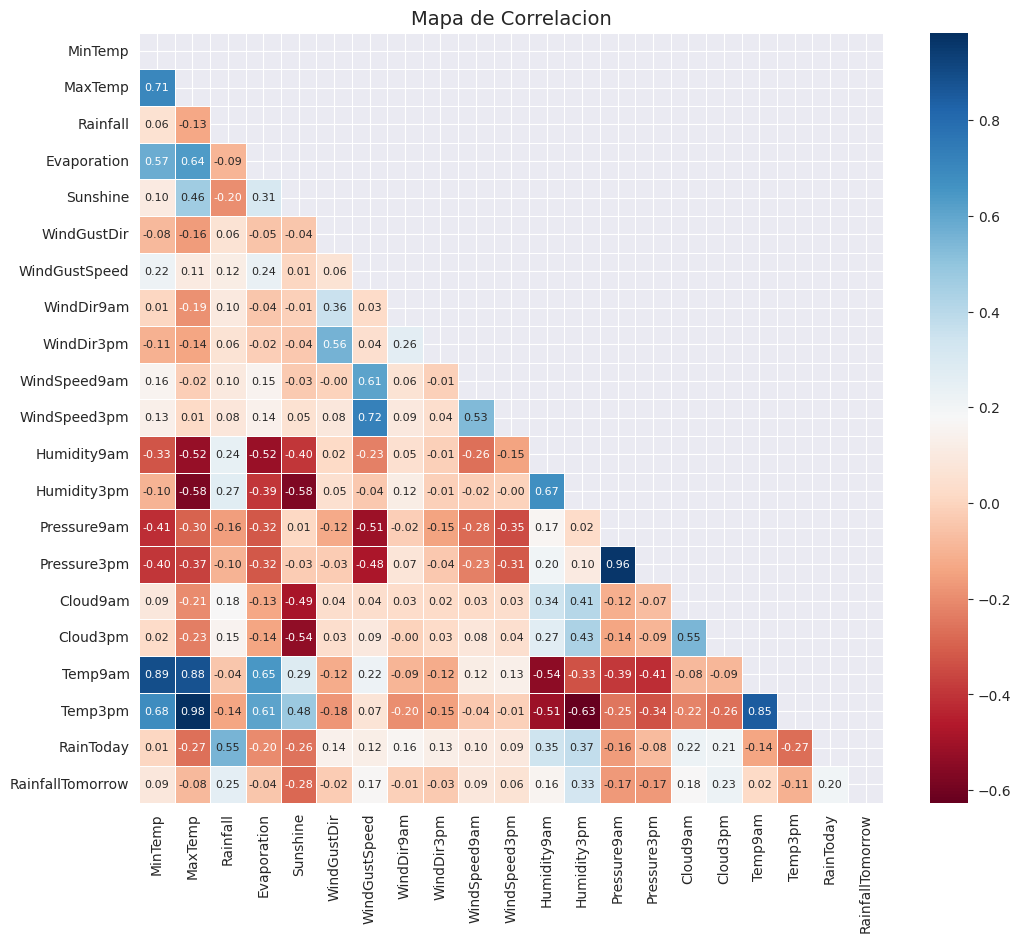

In [883]:
fig, ax = plt.subplots(figsize=(12,10))
plt.title("Mapa de Correlacion", fontsize=14)
mask = np.triu(np.ones_like(corr, dtype=bool)) # MASCARA PARA GRAFICAR SOLO UN TRIANGULO DE LA MATRIZ DE CORRELACION
# Genera el heatmap incluyendo la mascara mask
heatmap = sns.heatmap(corr,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # la mascara ha sido incluida aqui
                      ax=ax)

plt.show()

Las variables que presentan las correlaciones mas altas con 'RainfallTomorrow':



*   Humidity3pm: + 0.33
*   Rainfall: + 0.25
*   Sunshine: - 0.28
*   Cloud3pm; + 0.23
*   RainToday: + 0.20

Las variables que miden la misma magnitud fisica y que presentan las correlaciones mas altas son:

*   MaxTemp - Temp3pm: + 0.98
*   Pressure9am - Pressure3pm: + 0.96
*   MinTemp - Temp9pm: + 0.89
*   Humidity9am - Humidity3pm: + 0.67




*De lo observado en las graficas de las variables y de la matriz de correlacion entre las mismas, teniendo en cuenta la similitud entre pares de variables de temperatura por un lado, presiones por otro, nubosidad y tambien humedad, vamos a resumirlas en una sola variable de acuerdo a cada magnitud meteorologica medida.*


In [884]:
col_a_eliminar= ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X_train['Temperature']= X_train['Temp3pm'] - X_train['Temp9am']
X_train['Pressure']= X_train['Pressure3pm'] - X_train['Pressure9am']
X_train['Humidity']= X_train['Humidity3pm'] - X_train['Humidity9am']
X_train['Cloud']= X_train['Cloud3pm'] - X_train['Cloud9am']
# Elininamos las variables resumidas
X_train.drop(columns= col_a_eliminar, inplace= True)


### **MODELOS**

*A continuación, experimentaremos con modelos de regresión lineal estándar y modelos regularizados con Ridge, Lasso y ElasticNet.*

In [885]:
y_train= X_train['RainfallTomorrow']
X_train.drop(columns= ['RainfallTomorrow'], inplace= True)

In [886]:
X_train.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
RainToday        0
Temperature      0
Pressure         0
Humidity         0
Cloud            0
dtype: int64

*Al conjunto de datos de testeo, X_test, lo transformamos de la misma forma que lo hicimos con el de entrenamiento, X_train, pero las imputaciones de datos faltantes las realizamos con los indicadores estadisticos (mediana, moda) del set de entrenamiento y no con los del test.*

In [887]:
X_test['RainfallTomorrow'] = y_test

In [888]:
X_test.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainfallTomorrow'],
      dtype='object')

In [889]:
## Obtener los nombres de las variables numericas y categoricas
num_var = [variable for variable in X_test.columns if X_test[variable].dtypes == ('int64' and 'float64') ]
cat_var = [variable for variable in X_test.columns if X_test[variable].dtypes == ('O')]

In [890]:
# Imputamos los valores nulos numericos
for col in num_var:
  cambiar_mediana_test(X_test, col)

In [891]:
# Imputamos los valores nulos categoricos
for col in cat_var:
  cambiar_moda_test(X_test, col)

In [892]:
# Verificamos que X_test no tenga nulos
X_test.isnull().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainfallTomorrow    0
dtype: int64

In [893]:
# # Imputamos los valores faltantes de las varaiables categoricas
# imput_cat = ColumnTransformer([('category', SimpleImputer(strategy='most_frequent'), cat_var)])
# X_test[cat_var] = imput_cat.fit_transform(X_test[cat_var])

In [894]:
# # Imputamos los valores faltantes de las varaiables numericas
# imput_num = ColumnTransformer([('numeric', SimpleImputer(strategy='median'), num_var)])
# X_test[num_var] = imput_num.fit_transform(X_test[num_var])

In [895]:
# Codificamos las variables categoricas con valores numericos
categorico = X_test.select_dtypes(include = "object").columns
for col in categorico:
    X_test[col] = X_test[col].astype(str)
for i in range(len(categorico)):
    X_test[categorico[i]] = LabelEncoder().fit_transform(X_test[categorico[i]])

In [896]:
X_test[cat_var]

,WindGustDir,WindDir9am,WindDir3pm,RainToday
32882,6,15,2,1
69743,8,4,15,0
66551,8,4,15,1
83352,15,15,16,1
83353,10,10,11,1
...,...,...,...,...
49007,8,4,8,1
83979,14,8,15,2
9054,16,14,12,1
99480,14,0,13,1


In [897]:
X_test.drop(columns='Date', inplace=True)

In [898]:
# Resumimos variables
col_a_eliminar= ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X_test['Temperature']= X_test['Temp3pm'] - X_test['Temp9am']
X_test['Pressure']= X_test['Pressure3pm'] - X_test['Pressure9am']
X_test['Humidity']= X_test['Humidity3pm'] - X_test['Humidity9am']
X_test['Cloud']= X_test['Cloud3pm'] - X_test['Cloud9am']
# Elininamos las variables resumidas
X_test.drop(columns= col_a_eliminar, inplace= True)


In [899]:
y_test= X_test['RainfallTomorrow']
X_test.drop(columns= ['RainfallTomorrow'], inplace= True)

# Regresion Lineal

In [900]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar.
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos.

model = make_pipeline(StandardScaler(), LinearRegression())

In [901]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [902]:
model.steps[0]

('standardscaler', StandardScaler())

In [903]:
model.steps[1][1].n_features_in_

16

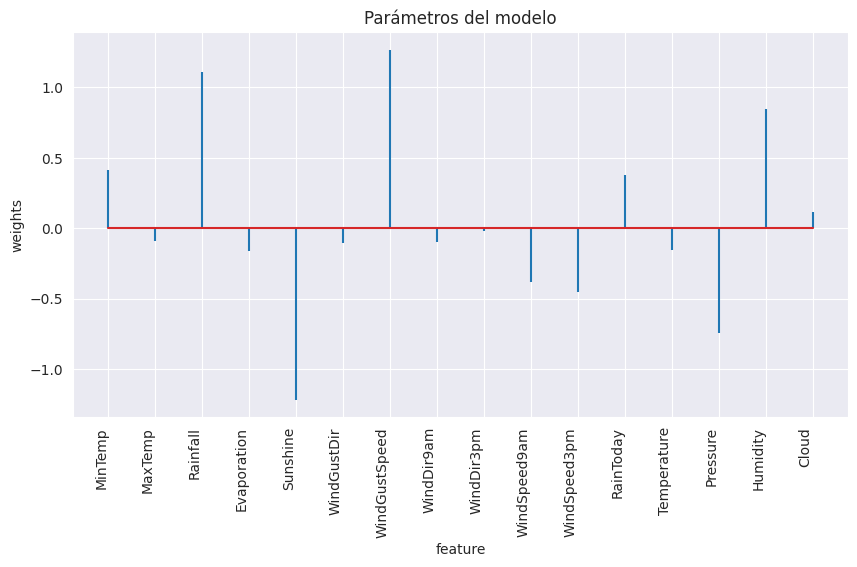

In [904]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

### Realizar predicciones sobre conjuntos de train y test

Medir métricas en ambos conjuntos nos ayuda a comprender cómo nuestro modelo se comporta en datos no vistos y a garantizar que esté generalizando correctamente.
Si el accuracy en Test es similar al del conjunto de entrenamiento, nuestro modelo generaliza bien.
Si hay una gran diferencia entre las métricas de entrenamiento y prueba, debemos ajustar el modelo (tunear parámetros, obtener más datos, etc.)

In [905]:
# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [906]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_train = metrics.r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [907]:
rmse_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_test = metrics.r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [908]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_train)
print(' R cuadrado (R2) Train: ', R2_train)
print(' Error absoluto medio (MAE) Train: ', mae_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_test)
print(' R cuadrado (R2) Test: ', R2_test)
print(' Error absoluto medio (MAE) Test: ', mae_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.608558849983166
 R cuadrado (R2) Train:  0.18308691109956232
 Error absoluto medio (MAE) Train:  2.6388541672493124

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.882091112480513
 R cuadrado (R2) Test:  0.201878169447968
 Error absoluto medio (MAE) Test:  3.050665440059967


Para este modelo podemos obervar que el MSE, R2 y MAE en el conjunto de entrenamiento y prueba son bastante similares, lo que sugiere que el modelo no hace overfitting ni underfitting.
El valor de R2 en ambos conjuntos es relativamente bajo, lo que indica que el modelo puede no estar prediciendo tan bien.


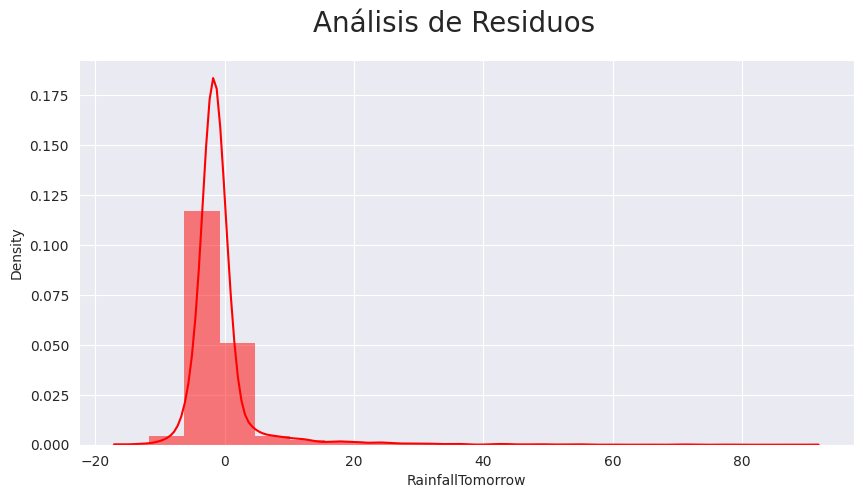

In [909]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred_test), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

Este gráfico nos deja ver que las predicciones tienden a ser mas bajas que los valores reales para estas observaciones, también puede indicar la existencia de valores atípicos.

De la grafica y el calculo del 3er. cuartil, vemos que el 75 % de los valores de los residuos es a los sumo  -0.21, con un valor maximo de 92 mm



In [910]:
(y_test-y_pred_test).quantile(0.75)


-0.20601994271573687

## Gradiente Descendiente

In [911]:
sgd_model = make_pipeline(StandardScaler(), SGDRegressor())

In [912]:
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

### Realizar predicciones sobre conjuntos de train y test

In [913]:
# Predicciones
y_pred_train = sgd_model.predict(X_train)
y_pred_test = sgd_model.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [914]:
rmse_sgd_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_sgd_train = metrics.r2_score(y_train, y_pred_train)
mae_sgd_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [915]:
rmse_sgd_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_sgd_test = metrics.r2_score(y_test, y_pred_test)
mae_sgd_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [916]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_sgd_train)
print(' R cuadrado (R2) Train: ', R2_train)
print(' Error absoluto medio (MAE) Train: ', mae_sgd_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_sgd_test)
print(' R cuadrado (R2) Test: ', R2_test)
print(' Error absoluto medio (MAE) Test: ', mae_sgd_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.614864508434673
 R cuadrado (R2) Train:  0.18308691109956232
 Error absoluto medio (MAE) Train:  2.638161644924472

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.893678322947086
 R cuadrado (R2) Test:  0.201878169447968
 Error absoluto medio (MAE) Test:  3.086430653354562


El análisis es muy similar al modelo anterior.

## Ridge Regression

Los métodos de regularización achican los coeficientes menos significativos para
reducir la varianza y así intentar aproximar a un mejor modelo.

In [917]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

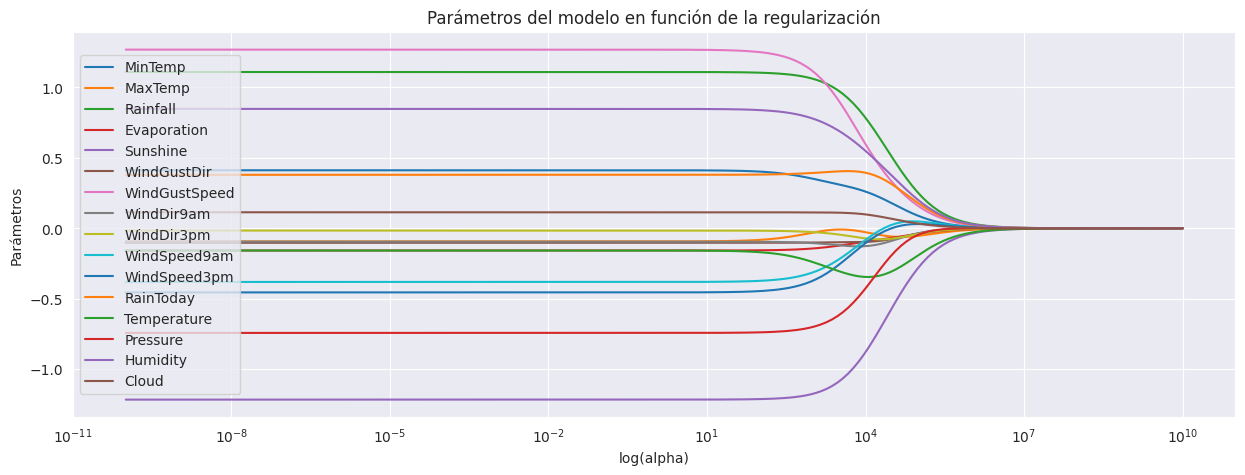

In [918]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

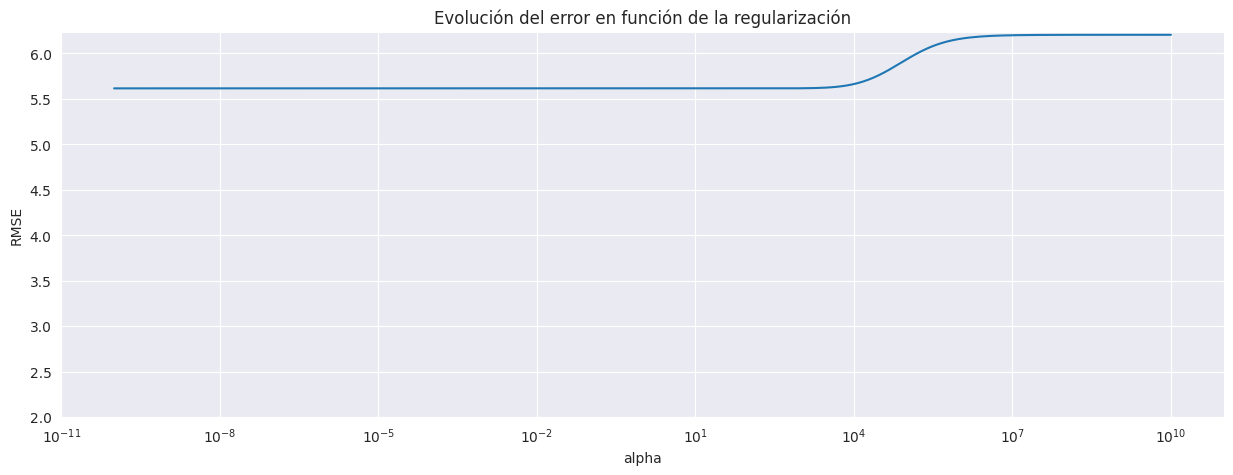

In [919]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [920]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 182.51834943190462


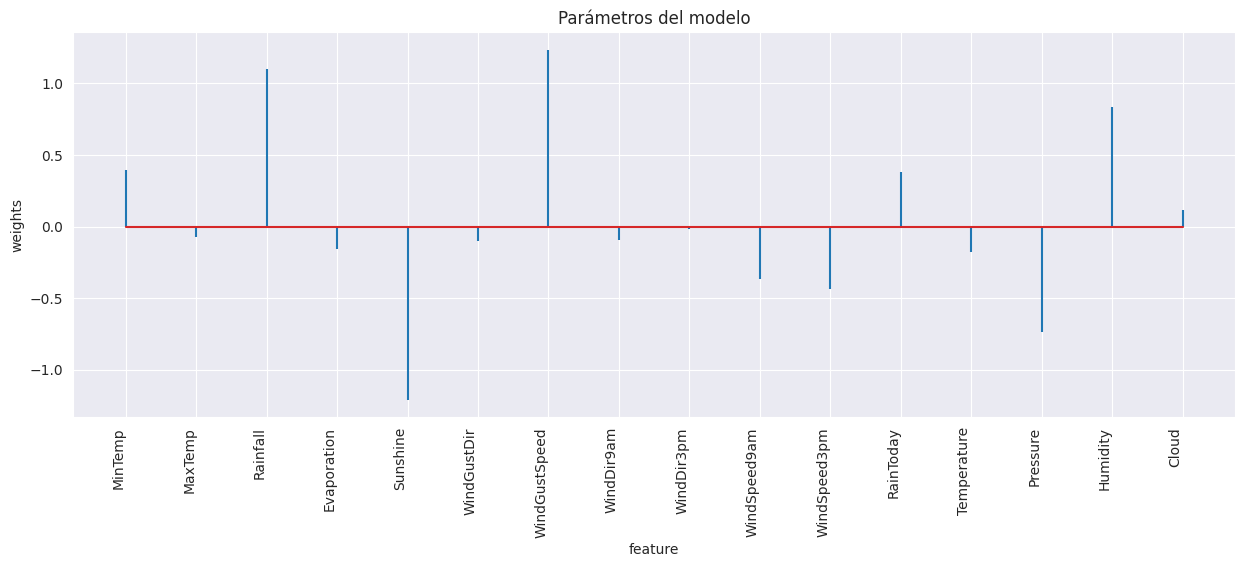

In [921]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

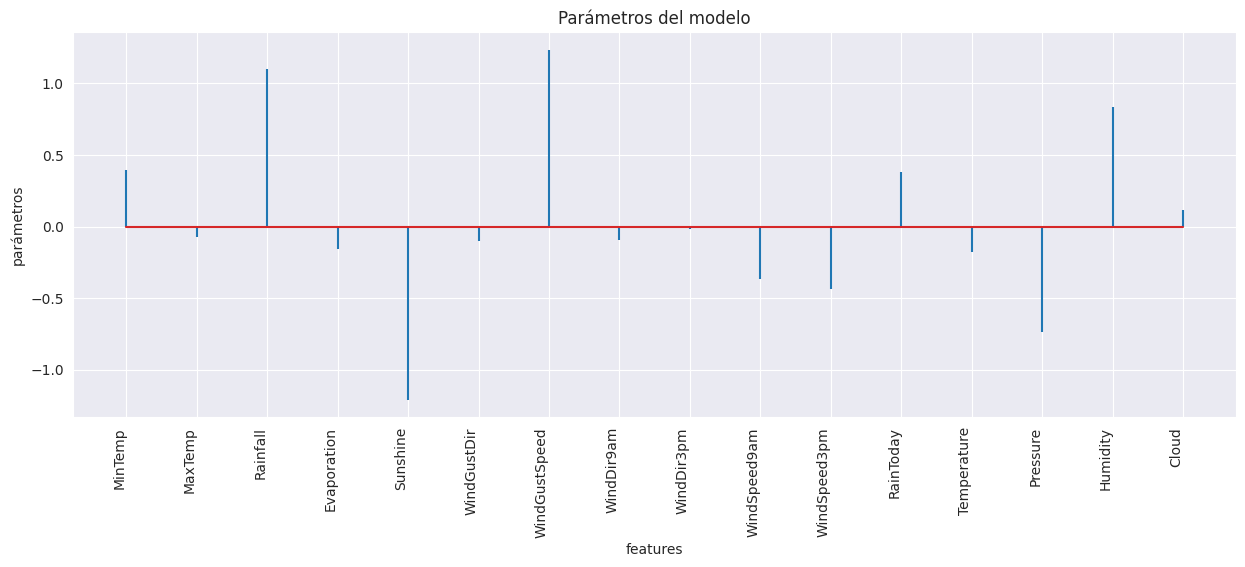

In [922]:
# Parámetros del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

### Realizar predicciones sobre conjuntos de train y test

In [923]:
# Predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [924]:
rmse_ridge_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_ridge_train = metrics.r2_score(y_train, y_pred_train)
mae_ridge_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [925]:
rmse_ridge_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_ridge_test = metrics.r2_score(y_test, y_pred_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [926]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_ridge_train)
print(' R cuadrado (R2) Train: ', R2_ridge_train)
print(' Error absoluto medio (MAE) Train: ', mae_ridge_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_ridge_test)
print(' R cuadrado (R2) Test: ', R2_ridge_test)
print(' Error absoluto medio (MAE) Test: ', mae_ridge_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.6086254602555465
 R cuadrado (R2) Train:  0.18306750678271433
 Error absoluto medio (MAE) Train:  2.6337474155143608

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.884947539857823
 R cuadrado (R2) Test:  0.20110282253485656
 Error absoluto medio (MAE) Test:  3.0538736654303067


Análisis similar a los otros modelos.

## Lasso Regression

In [927]:
modelo = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

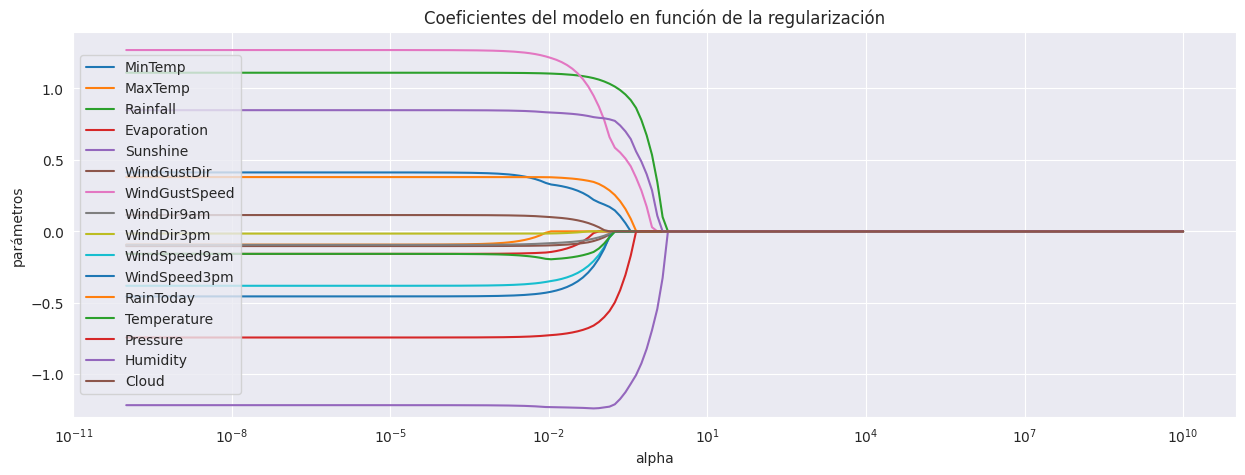

In [928]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-1.3,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

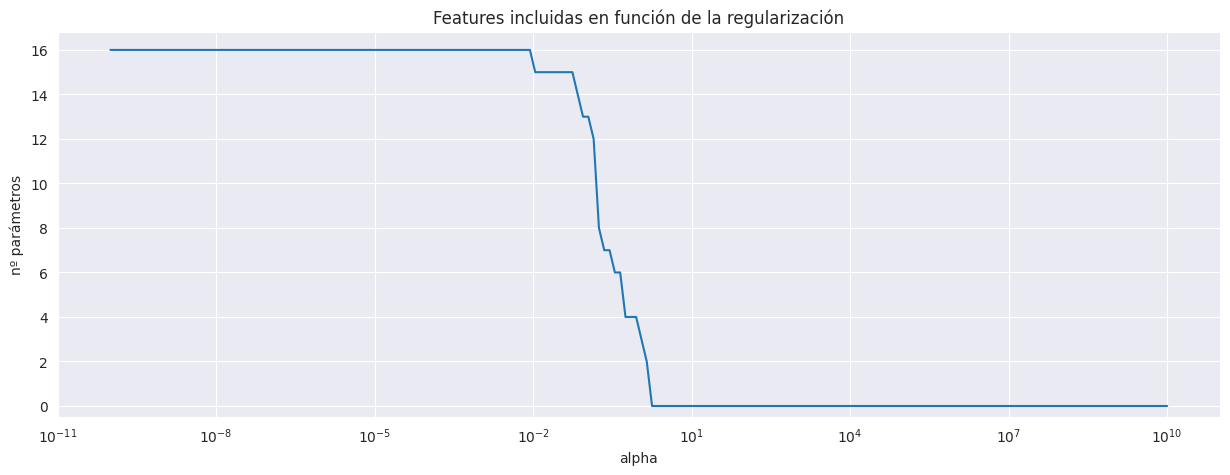

In [929]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

Observamos como a partir de cierto valor de alpha, los coeficientes se van haciendo 0, anulandose y el modelo deja de incluir esa caracteristica

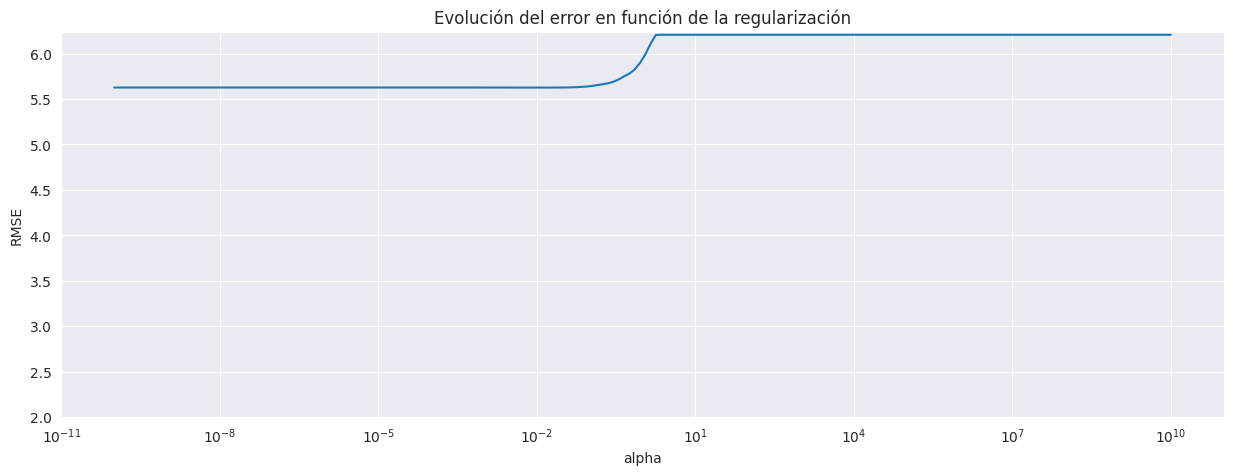

In [930]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [931]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.013826221737646593


In [932]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,MinTemp,0.322704
2,Rainfall,1.102651
3,Evaporation,-0.137655
4,Sunshine,-1.231353
5,WindGustDir,-0.096541
6,WindGustSpeed,1.200351
7,WindDir9am,-0.080668
8,WindDir3pm,-0.013992
9,WindSpeed9am,-0.341174
10,WindSpeed3pm,-0.413864


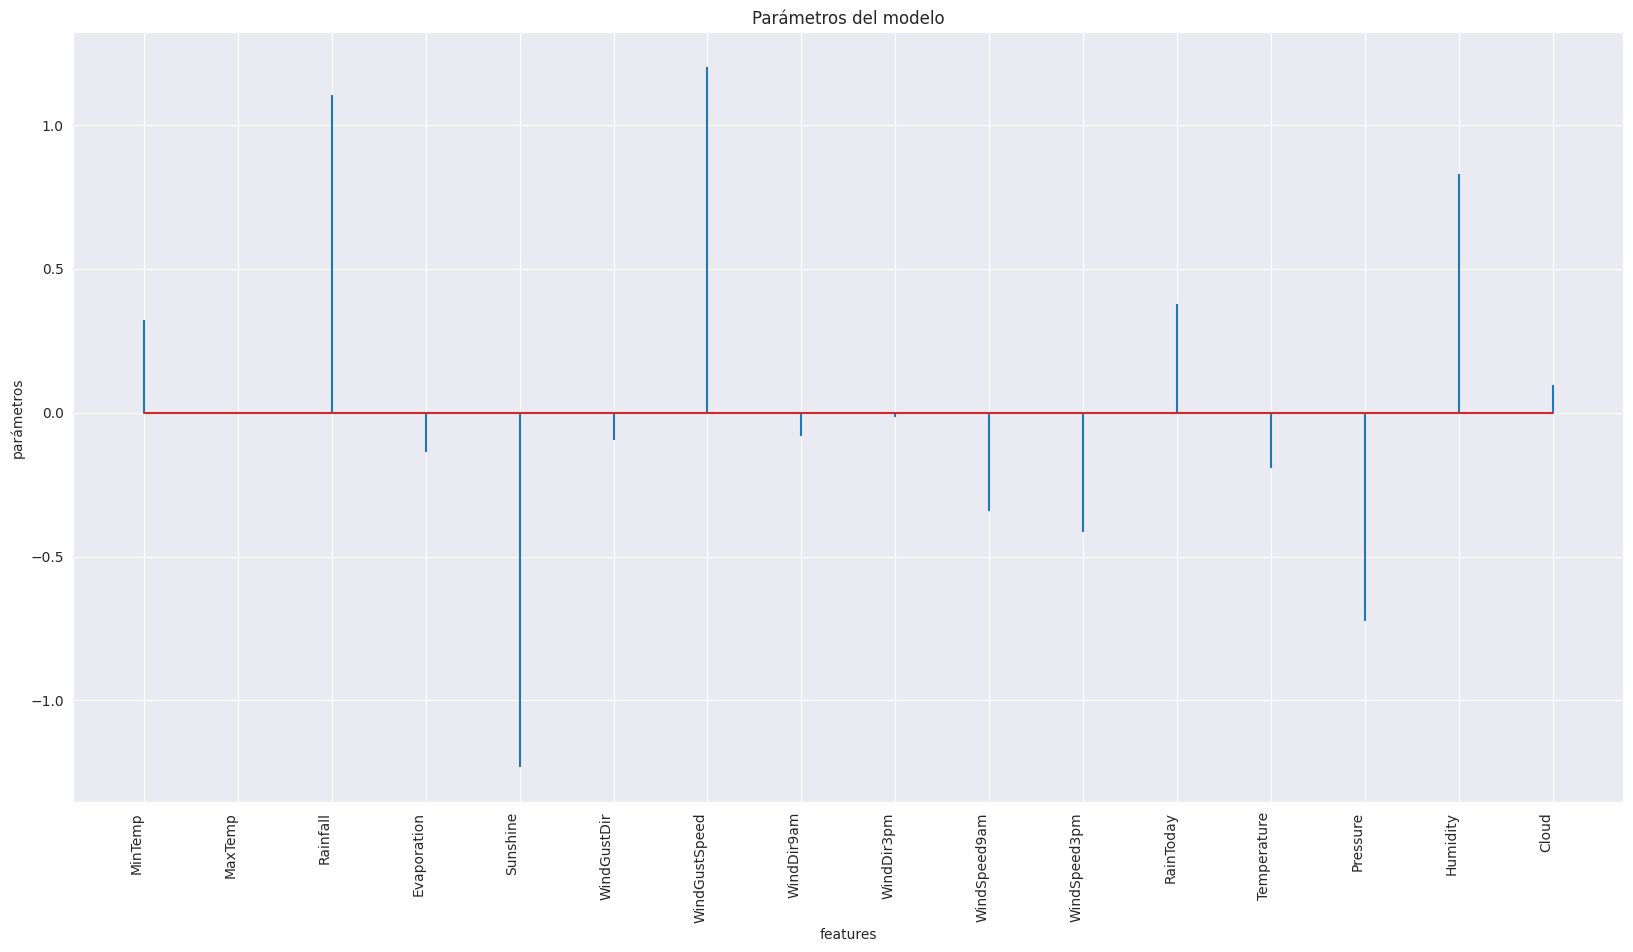

In [933]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

### Realizar predicciones sobre conjuntos de train y test

In [934]:
# Predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [935]:
rmse_lasso_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_lasso_train = metrics.r2_score(y_train, y_pred_train)
mae_lasso_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [936]:
rmse_lasso_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_lasso_test = metrics.r2_score(y_test, y_pred_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [937]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_lasso_train)
print(' R cuadrado (R2) Train: ', R2_lasso_train)
print(' Error absoluto medio (MAE) Train: ', mae_lasso_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_lasso_test)
print(' R cuadrado (R2) Test: ', R2_lasso_test)
print(' Error absoluto medio (MAE) Test: ', mae_lasso_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.608995214809396
 R cuadrado (R2) Train:  0.1829597889582114
 Error absoluto medio (MAE) Train:  2.6264201968821443

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.888231055190788
 R cuadrado (R2) Test:  0.20021108206627392
 Error absoluto medio (MAE) Test:  3.0495414867550568


Mismo análisis que modelos anteriores.

## ElasticNet

In [938]:
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

In [939]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,mod.alphas_,mse_cv,rmse_cv
516,0.50,2.196385e-02,31.642567,5.625173
717,0.70,1.742633e-02,31.642873,5.625200
515,0.50,2.768287e-02,31.642978,5.625209
716,0.70,2.196385e-02,31.643047,5.625215
517,0.50,1.742633e-02,31.643388,5.625246
...,...,...,...,...
1022,0.95,6.150986e+07,38.519726,6.206426
1023,0.95,4.880252e+07,38.519726,6.206426
1024,0.95,3.872039e+07,38.519726,6.206426
1018,0.95,1.552225e+08,38.519726,6.206426


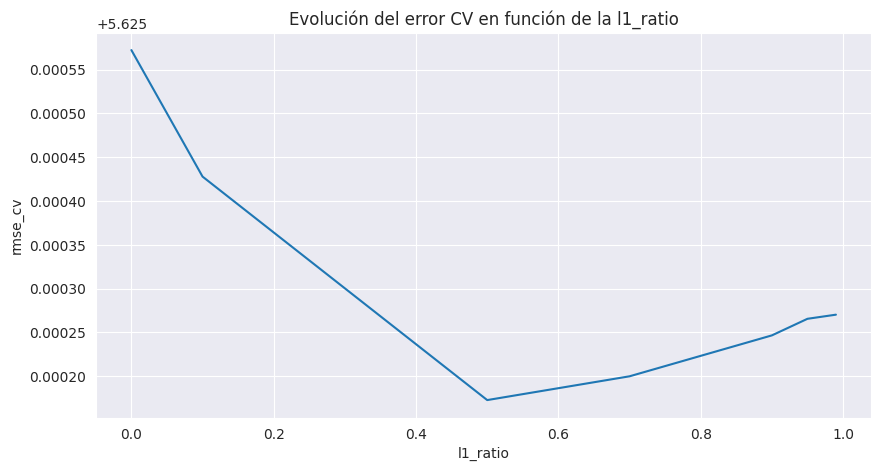

In [940]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [941]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

Mejor valor de alpha encontrado: 0.021963853724165514
Mejor valor de l1_ratio encontrado: 0.5


In [942]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

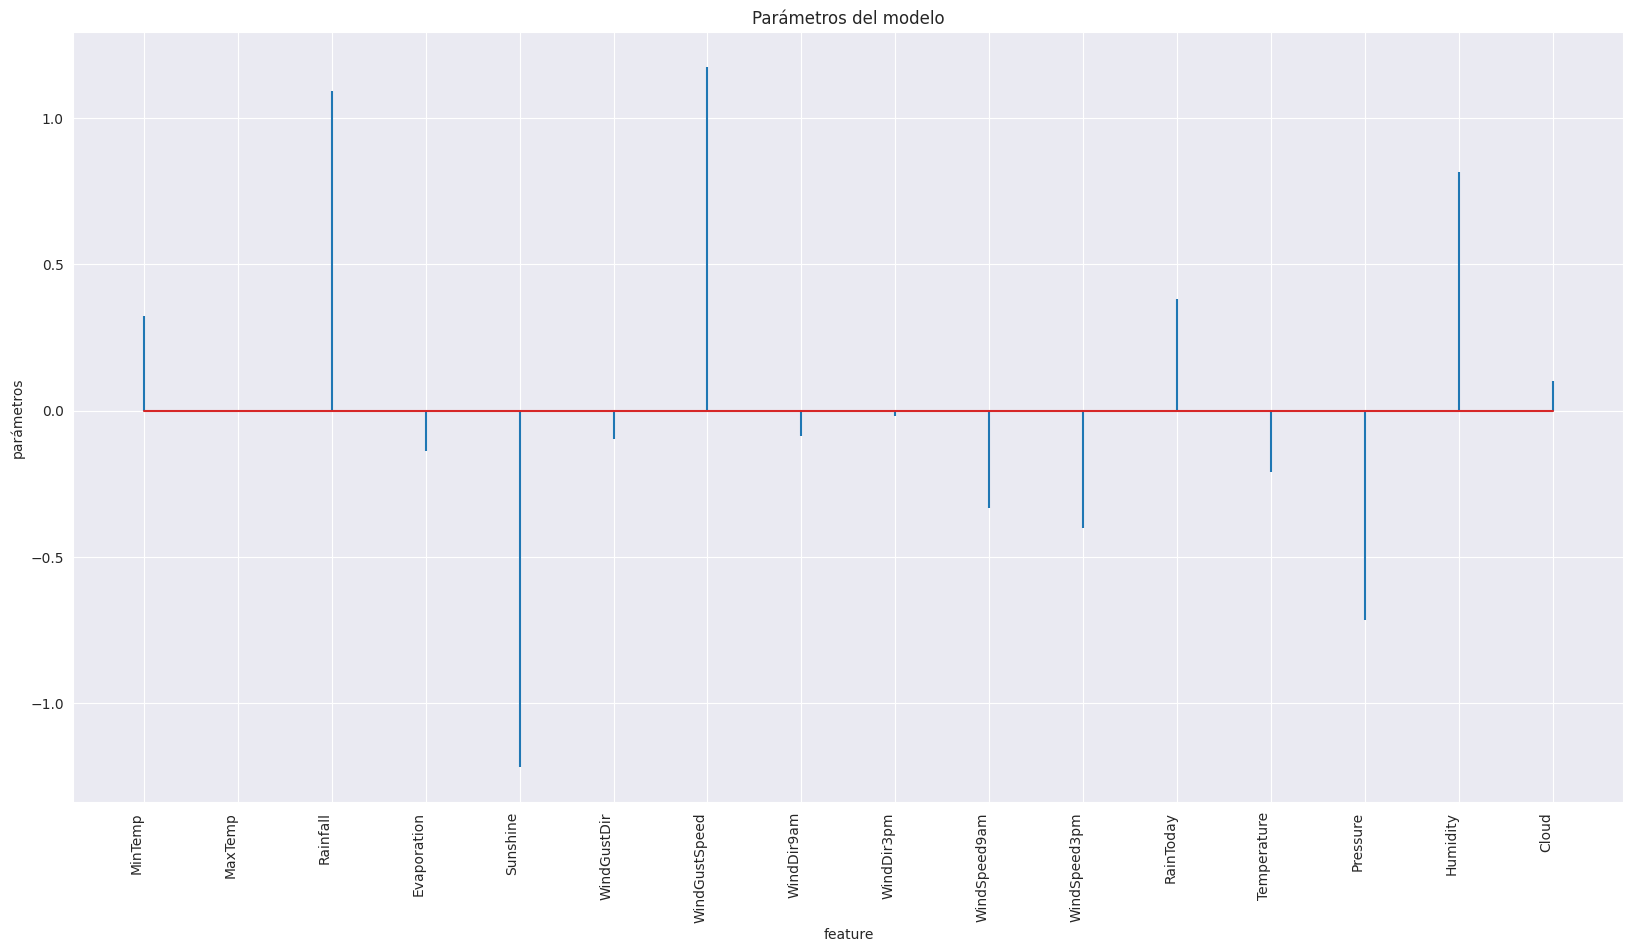

In [943]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

### Realizar predicciones sobre conjuntos de train y test

In [944]:
# Predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [945]:
rmse_elas_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_elas_train = metrics.r2_score(y_train, y_pred_train)
mae_elas_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [946]:
rmse_elas_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_elas_test = metrics.r2_score(y_test, y_pred_test)
mae_elas_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [947]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_elas_train)
print(' R cuadrado (R2) Train: ', R2_elas_train)
print(' Error absoluto medio (MAE) Train: ', mae_elas_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_elas_test)
print(' R cuadrado (R2) Test: ', R2_elas_test)
print(' Error absoluto medio (MAE) Test: ', mae_elas_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.609200829584463
 R cuadrado (R2) Train:  0.18289988567358606
 Error absoluto medio (MAE) Train:  2.6225470468766585

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.890810128626752
 R cuadrado (R2) Test:  0.19951030586619922
 Error absoluto medio (MAE) Test:  3.053936937558727


Mismo análisis que los demás modelos.

# Comparación de métricas de modelos

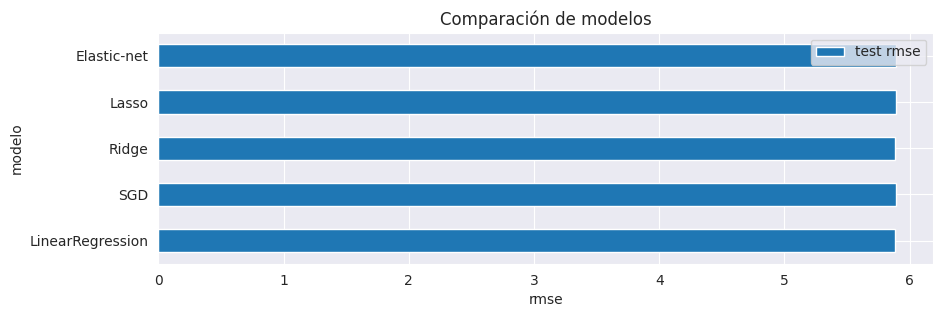

In [948]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'SGD', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test]

                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [949]:
rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test

(5.882091112480513,
 5.893678322947086,
 5.884947539857823,
 5.888231055190788,
 5.890810128626752)

*RMSE_test:* Las predicciones del modelo de regresion lineal están desviadas de los valores reales por aproximadamente 5.9451 unidades.

*RMSE_sgd_test:* Las predicciones del modelo por optimizacion del descenso gradiente están desviadas de los valores reales por aproximadamente 5.9606 unidades.

*RMSE_ridge_test:* Las predicciones del modelo con Ridge están desviadas de los valores reales por aproximadamente 5.9465 unidades.

*RMSE_lasso_test:* Las predicciones del modelo con Lasso están desviadas de los valores reales por aproximadamente 5.9473 unidades.

*RMSE_elas_test:* Las predicciones del modelo con Elastic Net están desviadas de los valores reales por aproximadamente 5.9469 unidades.


Los valores de RMSE para todos los métodos son bastante similares, lo que indica que todos los modelos tienen un desempeño comparable en términos de la precisión de las predicciones.

In [950]:
R2_test, R2_sgd_test, R2_ridge_test, R2_lasso_test, R2_elas_test

(0.201878169447968,
 0.19873061041260254,
 0.20110282253485656,
 0.20021108206627392,
 0.19951030586619922)

*R2_test:* El 18.47% de la variabilidad en la variable dependiente puede ser explicada por el modelo de regresión lineal.

*R2_sgd_test:* El 18.04% de la variabilidad en la variable dependiente puede ser explicada por el modelo.

*R2_ridge_test:* Ridge explica aproximadamente el 18.43% de la variabilidad en la variable dependiente.

*R2_lasso_test:* Lasso explica aproximadamente el 18.41% de la variabilidad.

*R2_elas_test:* Elastic Net explica aproximadamente el 18.42% de la variabilidad en la variable dependiente.


Todos los métodos tienen un desempeño similar en términos de la cantidad de variabilidad en la variable dependiente que pueden explicar, con valores de R2 muy cercanos entre sí. Esto sugiere que los métodos de regresión lineal, tanto tradicionales como con regularización, pueden no estar capturando completamente la estructura en los datos.

## Conclusión
No llegamos a un buen fitting, lo concluimos observando las métricas obtenidas: un bajo R2, el cual indica el procentaje de la variablidad de 'RainfallTomorrow' que se explica con las variables que se seleccionan para entrenar modelos.
